In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 시나리오 가정
    - 채무가 있고, 장학금을 수령하지 못하는 학생일수록 중퇴할 확률이 높다.

In [27]:
df = pd.read_csv("./data/data_students.csv")

In [44]:
# df_original = df.copy()
# df_original
df=df_original.copy()

In [7]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [8]:
df.shape

(4424, 37)

In [10]:
# 결측치 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Previous qualification                          4424 non-null   object 
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nationality                                     4424 non-null   object 
 7   Mother's qualification                          4424 non-null   object 
 8   Father's qualification                          4424 non-null   object 
 9   Mother's occupation                      

In [11]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
Internationa

In [78]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nationality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units

In [14]:
df.describe(include = "object").T

,count,unique,top,freq
Marital status,4424,6,single,3919
Course,4424,17,Nursing,766
Previous qualification,4424,17,Secondary education,3717
Nationality,4424,21,Portuguese,4314
Mother's qualification,4424,29,Secondary Education - 12th Year of Schooling o...,1069
Father's qualification,4424,34,Basic education 1st cycle (4th/5th year) or eq...,1209
Mother's occupation,4424,32,Unskilled Workers,1577
Father's occupation,4424,46,Unskilled Workers,1010
Displaced,4424,2,yes,2426
Educational special needs,4424,2,no,4373


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age at enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Curricular units 1st sem (credited),4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
Curricular units 1st sem (enrolled),4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
Curricular units 1st sem (evaluations),4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
Curricular units 1st sem (approved),4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000


In [16]:
#정답(Label) 확인
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [45]:
# 채무가 있으면서 장학금을 받지 못한 학생 확인
df[["Debtor", "Scholarship holder", "Target"]]

,Debtor,Scholarship holder,Target
0,no,no,Dropout
1,no,no,Graduate
2,no,no,Dropout
3,no,no,Graduate
4,no,no,Graduate
...,...,...,...
4419,no,no,Graduate
4420,yes,no,Dropout
4421,no,yes,Dropout
4422,no,yes,Graduate


<Figure size 1200x600 with 0 Axes>

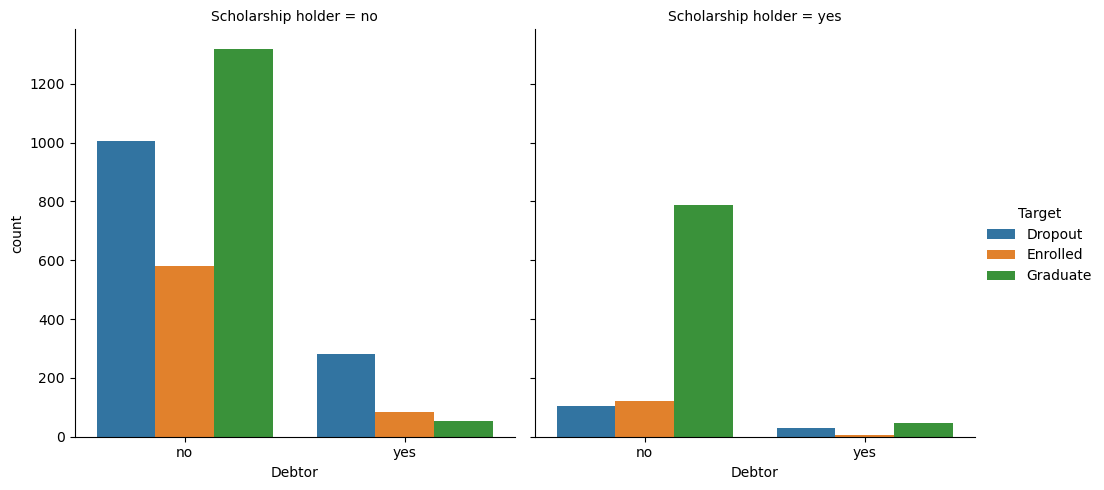

In [47]:
grouped = df.groupby(['Debtor', 'Scholarship holder', 'Target']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.catplot(data=grouped, x='Debtor', y='count', hue='Target', col='Scholarship holder', kind='bar', hue_order=['Dropout', 'Enrolled', 'Graduate'])

# x축과 y축 라벨 설정
plt.xticks(ticks=[0,1], labels=['no', 'yes'])
plt.ylabel('Number of Students')
plt.xlabel('Debtor')
plt.show()

<Figure size 1200x600 with 0 Axes>

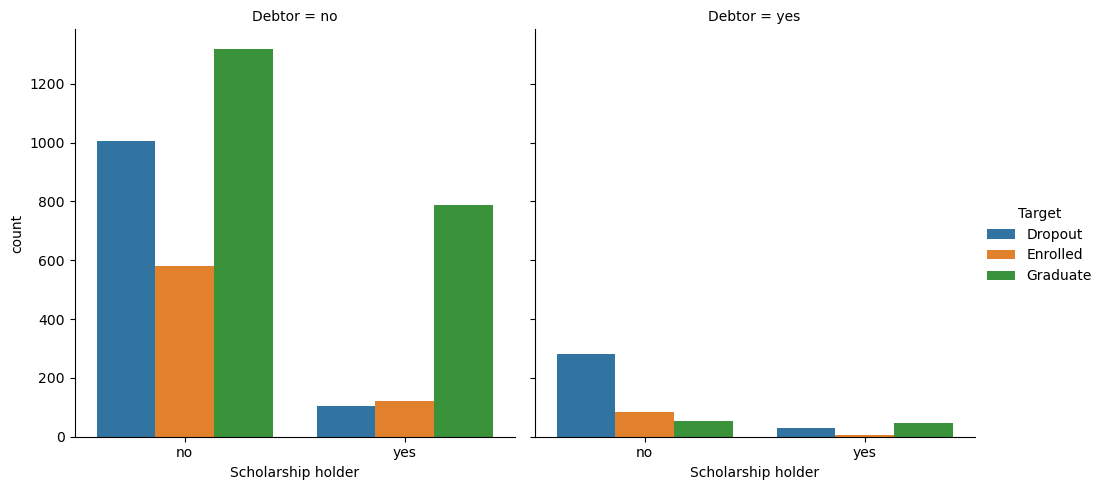

In [49]:
grouped = df.groupby(['Debtor', 'Scholarship holder', 'Target']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.catplot(data=grouped, x='Scholarship holder', y='count', hue='Target', col='Debtor', kind='bar', hue_order=['Dropout', 'Enrolled', 'Graduate'])

# x축과 y축 라벨 설정
plt.xticks(ticks=[0,1], labels=['no', 'yes'])
plt.ylabel('Number of Students')
plt.xlabel('Scholarship holder')
plt.show()

<Figure size 1200x600 with 0 Axes>

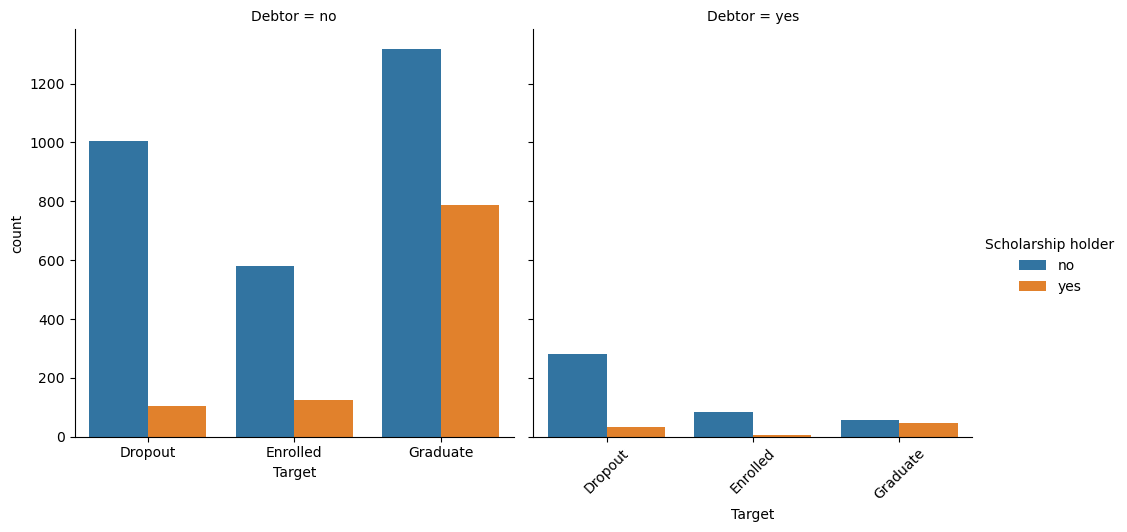

In [51]:
# Debtor, Scholarship holder, Target으로 그룹화하여 카운트 계산
grouped = df.groupby(['Debtor', 'Scholarship holder', 'Target']).size().reset_index(name='count')

# Target 값만을 시각화하기 위해 countplot 사용
plt.figure(figsize=(12, 6))
sns.catplot(data=grouped, x='Target', y='count', hue='Scholarship holder', col='Debtor', kind='bar')

# x축과 y축 라벨 설정
plt.ylabel('Number of Students')
plt.xlabel('Target')
plt.xticks(rotation=45)
plt.show()

In [52]:
# 장학금 수령과 채무는 자퇴와 관계가 있어 보인다

In [53]:
numeric_list = [] # 수치형 컬럼들의 컬럼명
categorical_list = [] # 범주형 컬럼들의 컬럼명
for column in df.columns:
    if df[column].dtype == 'O': # 해당 컬럼이 문자형인 경우에
        categorical_list.append(column) # 범주형 컬럼명 리스트에 추가!
    else:
        numeric_list.append(column) # 수치형 컬럼명 리스트에 추가!

display(numeric_list)
display(categorical_list)

['Application mode',
 'Application order',
 'Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

['Marital status',
 'Course',
 'Previous qualification',
 'Nationality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Target',
 'Daytime/evening attendance']

In [54]:
df[categorical_list]

,Marital status,Course,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target,Daytime/evening attendance
0,single,Animation and Multimedia Design,Secondary education,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,yes,no,no,yes,male,no,yes,Dropout,daytime
1,single,Tourism,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,yes,no,no,no,male,no,yes,Graduate,daytime
2,single,Communication Design,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,yes,no,no,no,male,no,yes,Dropout,daytime
3,single,Journalism and Communication,Secondary education,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,yes,no,no,yes,female,no,yes,Graduate,daytime
4,married,Social Service (evening attendance),Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,no,no,no,yes,female,no,yes,Graduate,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,Journalism and Communication,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,"Personal Services, Security and Safety Workers...",Administrative staff,no,no,no,yes,male,no,yes,Graduate,daytime
4420,single,Journalism and Communication,Secondary education,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,Unskilled Workers,yes,no,yes,no,female,no,no,Dropout,daytime
4421,single,Nursing,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,yes,no,no,yes,female,yes,yes,Dropout,daytime
4422,single,Management,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction and ...",Administrative staff,yes,no,no,yes,female,yes,yes,Graduate,daytime


In [65]:
df_label = df[categorical_list].loc[:, 'Displaced':'Daytime/evening attendance']
df_label

,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target,Daytime/evening attendance
0,yes,no,no,yes,male,no,yes,Dropout,daytime
1,yes,no,no,no,male,no,yes,Graduate,daytime
2,yes,no,no,no,male,no,yes,Dropout,daytime
3,yes,no,no,yes,female,no,yes,Graduate,daytime
4,no,no,no,yes,female,no,yes,Graduate,evening
...,...,...,...,...,...,...,...,...,...
4419,no,no,no,yes,male,no,yes,Graduate,daytime
4420,yes,no,yes,no,female,no,no,Dropout,daytime
4421,yes,no,no,yes,female,yes,yes,Dropout,daytime
4422,yes,no,no,yes,female,yes,yes,Graduate,daytime


In [67]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

In [105]:
label_columns = [
    "Displaced", 
    "Educational special needs", 
    "Debtor", 
    "Tuition fees up to date", 
    "Gender", 
    "Scholarship holder", 
    "International", 
    "Target", 
    "Daytime/evening attendance"
]
label_enc = LabelEncoder()

for column in label_columns:
    df[column] = label_enc.fit_transform(df[column])

df

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Daytime/evening attendance
0,single,17,5,Animation and Multimedia Design,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,single,15,1,Tourism,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,single,1,5,Communication Design,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,single,17,2,Journalism and Communication,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,married,39,1,Social Service (evening attendance),Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1,6,Journalism and Communication,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,"Personal Services, Security and Safety Workers...",...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,0
4420,single,1,2,Journalism and Communication,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,0
4421,single,1,1,Nursing,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,0
4422,single,1,1,Management,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction and ...",...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,0


In [106]:
# 수치형과 범주형 다시 계산
numeric_list = [] # 수치형 컬럼들의 컬럼명
categorical_list = [] # 범주형 컬럼들의 컬럼명
for column in df.columns:
    if df[column].dtype == 'O': # 해당 컬럼이 문자형인 경우에
        categorical_list.append(column) # 범주형 컬럼명 리스트에 추가!
    else:
        numeric_list.append(column) # 수치형 컬럼명 리스트에 추가!

display(numeric_list)
display(categorical_list)

['Application mode',
 'Application order',
 'Previous qualification (grade)',
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target',
 'Daytime/evening attendance']

['Marital status',
 'Course',
 'Previous qualification',
 'Nationality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation"]

In [109]:
corr_matrix = df[numeric_list].drop(columns=['Target']).corr()
corr_matrix

,Application mode,Application order,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Daytime/evening attendance
Application mode,1.000000,-0.286357,-0.039020,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,0.304092
Application order,-0.286357,1.000000,-0.064484,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,-0.158657
Previous qualification (grade),-0.039020,-0.064484,1.000000,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,-0.052597
Admission grade,-0.013271,-0.096930,0.580444,1.000000,-0.000543,-0.018306,-0.014423,0.054132,0.008315,0.018881,...,0.040225,-0.041878,-0.057132,0.076659,0.074402,-0.013254,0.038756,-0.021624,-0.019519,-0.007970
Displaced,-0.301197,0.332362,-0.011001,-0.000543,1.000000,0.004395,-0.089901,0.096027,-0.125815,0.072887,...,-0.091738,-0.041823,-0.038839,0.063698,0.069087,-0.035959,-0.130327,-0.012385,0.062875,-0.251767
Educational special needs,-0.030779,0.025597,-0.001458,-0.018306,0.004395,1.000000,0.001343,0.013630,-0.017461,0.021223,...,-0.021671,-0.028777,-0.010851,-0.016315,-0.012761,-0.007491,0.046131,0.004396,0.012016,-0.031017
Debtor,0.122818,-0.072151,-0.037507,-0.014423,-0.089901,0.001343,1.000000,-0.408454,0.053812,-0.067489,...,0.025414,-0.029436,0.024201,-0.146977,-0.139424,0.048552,0.021128,-0.021888,0.075050,-0.006658
Tuition fees up to date,-0.136262,0.055891,0.060578,0.054132,0.096027,0.013630,-0.408454,1.000000,-0.104098,0.137421,...,0.014204,0.085918,0.063482,0.291921,0.296480,-0.071817,0.013460,-0.000706,-0.002768,-0.038799
Gender,0.160130,-0.089559,-0.047874,0.008315,-0.125815,-0.017461,0.053812,-0.104098,1.000000,-0.169302,...,0.018737,-0.124227,-0.041789,-0.224266,-0.199133,0.057223,0.022195,0.003556,-0.008108,0.012326
Scholarship holder,-0.163117,0.073709,0.055965,0.018881,0.072887,0.021223,-0.067489,0.137421,-0.169302,1.000000,...,-0.076480,0.026416,-0.021410,0.202704,0.181227,-0.048723,0.055152,-0.031104,0.035650,-0.093912


In [125]:
# threshold = 0.9

# # 상관계수 행렬에서 절대값 기준으로 상삼각행렬만 추출
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # 상관관계가 threshold 이상인 컬럼을 리스트로 추출
# to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
# display(to_drop)

# # 해당 컬럼 제거
# df_reduced = df.drop(columns=to_drop)

# display(df_reduced)
# len(df_reduced.columns)

In [126]:
# 원핫 인코딩
ont_hot_columns = [
    "Marital status",
    "Course",
    "Previous qualification",
    "Nationality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]
df_one_hot = pd.get_dummies(df, columns=ont_hot_columns, dtype=np.int64)

In [127]:
df_one_hot

,Application mode,Application order,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,"Father's occupation_Technicians and professionals, of intermediate level of health",Father's occupation_Unskilled Workers,"Father's occupation_Unskilled workers in agriculture, animal production, fisheries and forestry","Father's occupation_Unskilled workers in extractive industry, construction, manufacturing and transport",Father's occupation_Vehicle drivers and mobile equipment operators,"Father's occupation_Workers in food processing, woodworking, clothing and other industries and crafts",Father's occupation_assembly workers.,Father's occupation_personal service workers,Father's occupation_sellers,Father's occupation_teachers
0,17,5,122.0,127.3,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,15,1,160.0,142.5,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5,122.0,124.8,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,17,2,122.0,119.6,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39,1,100.0,141.5,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,125.0,122.2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4420,1,2,120.0,119.0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4421,1,1,154.0,149.5,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4422,1,1,180.0,153.8,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
from sklearn.model_selection import train_test_split

In [128]:
X_one_hot = df_one_hot.drop(columns=['Target'])
y = df_one_hot['Target']

In [129]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2024, # 난수 고정
                                                    stratify = y # 분류 시에만 적용
)

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3096, 230), (1328, 230), (3096,), (1328,))

In [99]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [131]:
# LogisticRegression
lr_model = LogisticRegression(max_iter = 10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [132]:
# 교차검증
cross_val_score(lr_model, X_train, y_train, cv=5).mean()

0.7806858095784043

In [136]:
# SVM
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [137]:
# 교차검증
cross_val_score(svc_model, X_train, y_train, cv=5).mean()

0.658912397727865

In [138]:
# LogisticRegression이 더 낫다

In [140]:
# GridSearchCV
# 1. 경우의 설정
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

# 2. 객체 초기화, 옵션 설정
grid = GridSearchCV(
    lr_model, # 적용시킬 모델 지정
    params, # 경우의 수 설정
    scoring = 'accuracy', # 평가 기준 설정
    cv=3, # 교차 검증 횟수
    n_jobs = -1 # PC자원을 모두 사용하겠다!
)

# 3. 찾아라! 명령
grid.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [142]:
grid.best_estimator_

LogisticRegression(C=0.1, max_iter=10000)

In [143]:
# 평가
from sklearn.metrics import accuracy_score, classification_report

In [145]:
# 예측 및 평가
y_pred_train = grid.best_estimator_.predict(X_train)
y_pred_test = grid.best_estimator_.predict(X_test)

print(metrics.classification_report(y_train, y_pred_train)) # 훈련용 데이터셋에 대한 분류 평가지표
print(metrics.classification_report(y_test, y_pred_test)) # 데스트용 데이터셋에 대한 분류 평가지표

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       994
           1       0.65      0.40      0.50       556
           2       0.82      0.94      0.88      1546

    accuracy                           0.80      3096
   macro avg       0.76      0.72      0.73      3096
weighted avg       0.79      0.80      0.79      3096

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       427
           1       0.55      0.33      0.41       238
           2       0.79      0.90      0.84       663

    accuracy                           0.76      1328
   macro avg       0.71      0.67      0.68      1328
weighted avg       0.75      0.76      0.75      1328

